In [57]:
import pandas as pd 
import numpy as np
import jieba
import warnings
warnings.filterwarnings('ignore')

In [138]:
data =pd.read_table('/Users/jacquelin/Documents/python/MachineLearning-imooc-master/机器学习项目实战/贝叶斯-新闻分类/data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
data=data.dropna()
data.head(2)


,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ


## 结巴分词器

In [15]:
#结巴分词识别list
content=data['content'].values.tolist()
content_s=[]
for line in content:
    current_segment=jieba.lcut(line)
    if len(current_segment)>1 and current_segment!='\r\n': #没有换行符
        content_s.append(current_segment)

In [18]:
#转化为表格
df_content=pd.DataFrame({'content_s':content_s})
df_content.head()
#可以看到一些不需要的东西

,content_s
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [63]:
#停用词
stopwords=pd.read_csv("/Users/jacquelin/Documents/python/MachineLearning-imooc-master/机器学习项目实战/贝叶斯-新闻分类/stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head()
stopwords=pd.DataFrame(stopwords)
#有各机构出的停用词

In [64]:
def drop_stopwords(content,stopwords):
    contents_clean=[]
    all_words=[]
    for line in content:
        line_clean=[]
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
contents=df_content['content_s'].values.tolist() 
stopwords=stopwords['stopword'].values.tolist()
%time contents_clean,all_words=drop_stopwords(contents,stopwords)


CPU times: user 40.4 s, sys: 28.2 ms, total: 40.4 s
Wall time: 40.4 s


In [65]:
df_content['contents_clean']=contents_clean
df_content.head()

,content_s,contents_clean
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ...","[经销商, 电话, 试驾, 订车, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, 保常,..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０...","[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ...","[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ...","[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫...","[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [66]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,憬


In [67]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({'count':np.size})
words_count=words_count.reset_index().sort_values(by=['count'],ascending=False)
words_count.head()

,all_words,count
4076,中,5199
4208,中国,3115
88254,说,3055
1372,万,2390
104746,Ｔ,2310


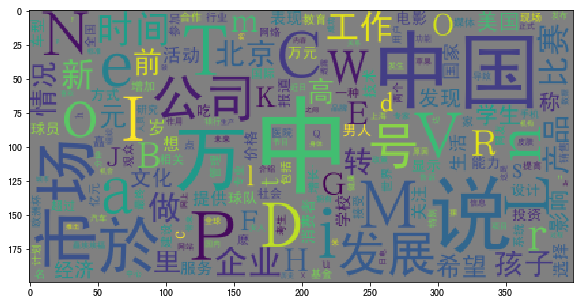

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path='/Users/jacquelin/Documents/python/MachineLearning-imooc-master/机器学习项目实战/贝叶斯-新闻分类/data/simhei.ttf',\
                   background_color='gray',max_font_size=80)
word_frequence={x[0]:x[1] for x in words_count.head(200).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### TF-IDF计算方式提取关键词

In [81]:
import jieba.analyse
index=4000
print(data['content'][index])
content_s_str=''.join(content_s[index])
print(' '.join(jieba.analyse.extract_tags(content_s_str,topK=6,withWeight=False)))


有网友贴出图显示陈宝国和妻子坐在道牙子上等待交警前来。Ｗ蛉沼型友爆料称陈宝国在烟台发生车祸，并上传图片为证。“一辆奥迪因越道超车撞上迎面驶来的公交车。把正常行驶的宝马（陈所乘车辆）撞在路边。所幸只是少数人受轻伤。”目前，陈宝国本人电话关机。经记者多方确认，陈宝国本人并无大碍，即将入组开拍新戏。Ｄ炕髡啐Ｗ约萸移淦拮右苍诔的邶Ｗ钤绶⒉即讼息的是本月１３日，有网友在微博上写道，“刚在毓璜顶医院（编者注：烟台一家医院）看到今天下午出车祸的陈宝国。没有什么大问题，我与他擦肩而过。”该网友还透露陈宝国在医院还与他人开玩笑：“他和一个女的说什么你看见了啊，我踩刹车了，我打方向盘了，你给我作证啊……”如果此条微博属实，那么当天开车的就是陈宝国本人。Ｇ叭眨“烟台日报传媒集团”官方微博称：７月１３日下午３：３０左右于烟台市牟平区养马岛发生一起交通事故。一辆奥迪Ａ６Ｌ因越道超车撞上迎面驶来的牟平——养马岛旅游专线公交车。把正常行驶的宝马车（陈宝国所乘坐的车辆）撞在路边。随后有多名网友跟帖声称亲眼所见。一名网友还将该段车祸视频上传，且附带数张图片。视频中，没有出现陈宝国身影，但在事发地点围观者的对话中却频频出现陈宝国的名字。而在曝光的多幅照片中，其中一张，显示两个在路边休息的模糊人影，该网友称是陈宝国和妻子赵奎娥。＞纪公司Ｉ硖逦薮蟀已进组拍戏Ｗ蛉眨有媒体以《宝马是残了宝国他没事》为题，报道了与网友讲述一致的事情经过，并透露陈报国是携妻回娘家探亲时在牟平遇车祸，岳父岳母均受轻伤，烟台警方已证实此事。据悉，陈宝国妻子赵奎娥是烟台人。昨日，记者就此事致电陈宝国本人，其电话一直关机。随后记者致电陈宝国经纪公司，对方表示；“陈宝国老师为人很低调，这事过去好几天了。接下来陈宝国马上要入组拍戏，还请大家多关注他的新作吧。”　记者勾伊娜
陈宝国 网友 烟台 车祸 本人 因越


## LDA模型提取主题(Latent Dirichlet Allocation)
前期格式处理成list of list

In [84]:
from gensim import corpora,models,similarities
import gensim
#建模库

In [90]:
#形成词袋
dictionary=corpora.Dictionary(contents_clean)
corpus=[dictionary.doc2bow(sentence) for sentence in contents_clean]

Lda=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=20)


In [124]:
print(Lda.print_topic(2,topn=5))
for topic in Lda.print_topics(num_topics=5,num_words=6):
    print(topic[1])

0.006*"孩子" + 0.006*"中" + 0.005*"说" + 0.004*"男人" + 0.004*"ａ"
0.015*"ｅ" + 0.014*"ａ" + 0.011*"ｎ" + 0.011*"ｏ" + 0.009*"ｒ" + 0.009*"ｉ"
0.009*"撒" + 0.008*"邱" + 0.004*"双江" + 0.003*"中" + 0.003*"公司" + 0.002*"欧洲杯"
0.003*"中" + 0.002*"市场" + 0.002*"中国" + 0.002*"经济" + 0.002*"工作" + 0.002*"投资"
0.008*"文化" + 0.007*"中" + 0.003*"吃" + 0.003*"食物" + 0.002*"Ｈ" + 0.002*"Ｍ"
0.006*"孩子" + 0.006*"中" + 0.005*"说" + 0.004*"男人" + 0.004*"ａ" + 0.003*"ｏ"


In [96]:
#文本转化为向量，基于贝叶斯算法进行分类
df_train_model=pd.DataFrame({'contents_clean':contents_clean,'label':data['category']})
print(df_train_model['label'].unique())
df_train_model.head()

['汽车' '财经' '科技' '健康' '体育' '教育' '文化' '军事' '娱乐' '时尚']


,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, 保常,...",汽车
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",汽车
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",汽车
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",汽车
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",汽车


In [97]:
#将label处理成计算机可识别的数字
mapping={"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train_model['label']=df_train_model['label'].map(mapping)
df_train_model.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, 保常,...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [132]:
from sklearn.model_selection import train_test_split
x=df_train_model['contents_clean'].values
y=df_train_model['label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)



In [133]:
#在将每篇文章转化为向量时，包识别的数据格式是list里边有一些str，str内各词用空格分开
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
def transform_words(x):
    words=[]
    for line_index in range(len(x)):
        try:
            words.append(' '.join(x[line_index]))
        except:
            print(line_index,word_index)      #未成功的要打印出来
    return words

train_words=transform_words(x_train)
train_words[1]
#后面还要对x_test转换，故而写成函数

'中 报 发布 之际 多家 券商 上半年 银行 整体 利润 增速 下滑 概率 事件 国泰君安 报告 预计 各家 银行 适度 提拨 备 费用 平滑 利润 上半年 家 上市 银行 净利润 增 上半年 家 上市 银行 净利润 平均 增幅 中信 建投 证券 银行业 分析师 杨荣 媒体 中国 银行业 面对 三个 转折点 盈利 转折点 资产 质量 转折点 业务 经营 模式 转折点 率 市场化 存贷款 利差 缩窄 挤压 银行 利润 银行 业内人士 坦言 上半年 银行 收益 影响 实体 经济 下滑 带来 企业 信贷 需求 下降 Ｒ 患倚 ⌒ 凸煞 葜 埔 行 分行 信贷 负责人 长期 合作 国有企业 减少 贷款额度 经营 计划 小企业 贷款 到期 无力 续约 预计 分行 上半年 新增 信贷 客户 去年同期 减少 有余 Ｊ 谐 构 预计 资产 质量 压力 迫使 银行 提高 拨备 挤压 银行 盈利 空间 同花顺 统计数据 显示 第一 季度末 家 上市 银行 平均 不良率 申银万国 报告 指出 预计 银行 不良率 反弹 中见 顶 顶点'

In [134]:
vector=CountVectorizer(analyzer='word',max_features=4000,lowercase=False)
vector.fit(train_words)
x_train_vec=vector.transform(train_words)
bay_clf=MultinomialNB()
bay_clf.fit(x_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [135]:
test_words=transform_words(x_test)
bay_clf.score(vector.transform(test_words),y_test)

0.804

## 采用TF-IDF算法训练模型

In [136]:
#文本训练模型：文本先转化为向量->fit模型->得出score值
from sklearn.feature_extraction.text import TfidfVectorizer
vector1=TfidfVectorizer(analyzer='word',max_features=4000,lowercase=False)
vector1.fit(train_words)
bay_clf.fit(vector1.transform(train_words),y_train)
bay_clf.score(vector1.transform(test_words),y_test)

0.8152